<a href="https://colab.research.google.com/github/shintafiaa/TeachingAssisting-ML/blob/main/Lecture_2_Linear_Regression/Linear_Regression_on_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prompt chatGPT: beri kode untuk menyambungkan google drive dengan google colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Persiapan Data:

Mulailah dengan memuat dataset CSV ke dalam Python menggunakan pustaka seperti pandas.
Periksa dan pahami struktur dataset, termasuk atribut dan target yang tersedia.

Pemisahan Data:

Pisahkan data menjadi atribut (X) dan target (y).
Biasanya, atribut adalah fitur-fitur yang digunakan untuk memprediksi target.

Pembuatan Model:

Gunakan pustaka seperti scikit-learn untuk membuat model regresi linear.
Inisialisasi model dan latih model menggunakan data yang sudah dipisahkan.

Evaluasi Model:

Evaluasi kinerja model menggunakan metrik yang sesuai, seperti mean squared error (MSE) atau coefficient of determination (R^2).

Visualisasi Hasil:

Visualisasikan hasil prediksi model terhadap data asli jika memungkinkan.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Baca file CSV dari Google Drive
data = pd.read_csv('/content/drive/MyDrive/Dataset/Salary_Data_Simple_SVR.csv')

# Lakukan operasi lainnya sesuai kebutuhan

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


Prompt: Ingin membuat model linear regression dengan dataset Salary_Data_Simple_SVR.csv bagaimana tahapannya?

In [6]:
# 2. Pemisahan Data
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [8]:
# 3. Pembuatan Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
# 4. Evaluasi Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 49830096.85590839


Prompt: beri kode untuk melakukan evaluasi dengan menggunakan RMSE, MAE, MAPPE, R2

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Hitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Hitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Hitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape = mean_absolute_percentage_error(y_test, y_pred)

# Hitung R^2
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R^2 Score:", r2)

Root Mean Squared Error (RMSE): 7059.04362190151
Mean Absolute Error (MAE): 6286.453830757749
Mean Absolute Percentage Error (MAPE): 7.744880046205216
R^2 Score: 0.9024461774180497


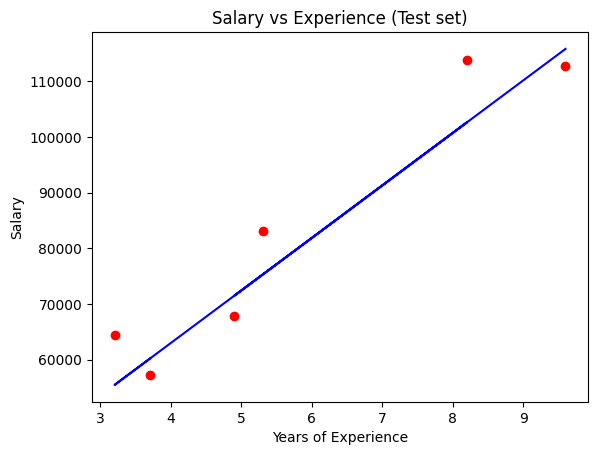

In [11]:
# 5. Visualisasi Hasil
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Prompt: Bagaimana cara memvisualisasikan data train, data test, dengan garis regresi dari modelnya?

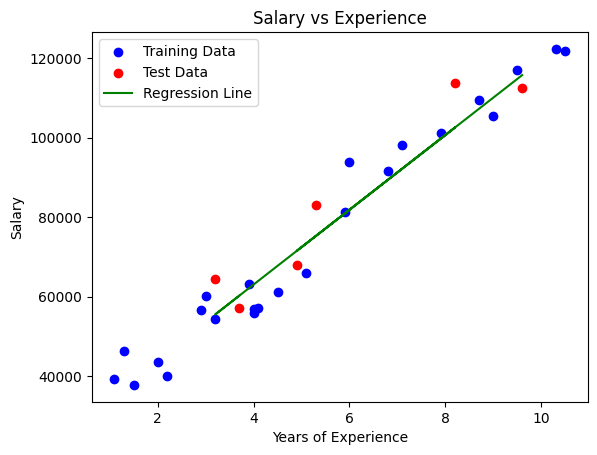

In [14]:
# Visualisasi data train
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Visualisasi data test
plt.scatter(X_test, y_test, color='red', label='Test Data')

# Visualisasi garis regresi
plt.plot(X_test, y_pred, color='green', label='Regression Line')

plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


In [18]:
# Buat DataFrame untuk data test
df_test = pd.DataFrame(X_test, columns=['YearsExperience'])

# Tambahkan kolom 'Actual' untuk nilai aktual
df_test['Actual'] = y_test

# Tambahkan kolom 'Predicted' untuk nilai prediksi
df_test['Predicted'] = y_pred

df_test


,YearsExperience,Actual,Predicted
0,9.6,112635.0,115790.210113
1,4.9,67938.0,71498.278095
2,8.2,113812.0,102596.868661
3,5.3,83088.0,75267.804224
4,3.2,64445.0,55477.792045
5,3.7,57189.0,60189.699707


Prompt: Bagaimana cara menginputkan data baru dan meminta supaya model memberikan prediksi dari data yang kita masukkan?

In [19]:
# Misalkan kita memiliki data baru dalam bentuk numpy array
new_data = np.array([[10]])  # Contoh: satu data baru dengan pengalaman 10 tahun

# Lakukan prediksi dengan model
predicted_salary = model.predict(new_data)

print("Predicted Salary:", predicted_salary)

Predicted Salary: [119559.73624209]
